In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear,relu,sigmoid
%matplotlib inline

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)



In [10]:
x,y = np.load('X.npy'),np.load('y.npy')

In [7]:
# softmax function
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [8]:
z = np.array([1.,2.,3.,4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f'my_softmax(z): {a} ')
print(f'tensorflow softmax(z):{atf} ')


my_softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426] 
tensorflow softmax(z):[0.0320586  0.08714432 0.23688282 0.64391426] 


In [12]:
print('The shape of X is : ' +str(x.shape))
print('The shape of y is : ' +str(y.shape))

The shape of X is : (5000, 400)
The shape of y is : (5000, 1)


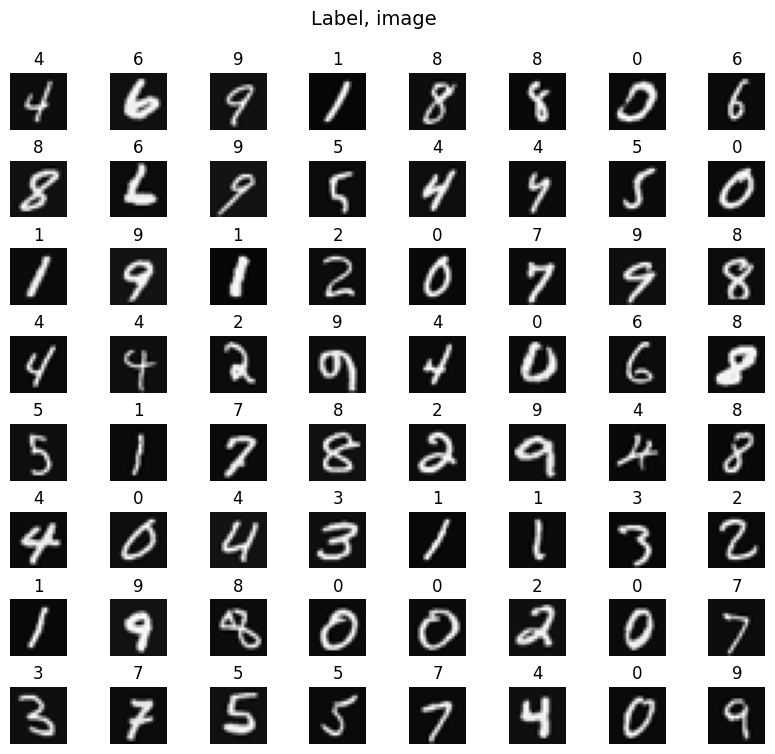

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
#widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [20]:
# Sequential model
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input((400,)),
    Dense(units=24,activation = 'relu',name = 'L1'),
    Dense(units=15,activation = 'relu',name = 'L2'),
    Dense(units=10,activation= 'linear',name = 'L3'),
    


],name='my_model'
)

In [22]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 24)                9624      
                                                                 
 L2 (Dense)                  (None, 15)                375       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10159 (39.68 KB)
Trainable params: 10159 (39.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
[layer1,layer2,layer3] = model.layers

In [24]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 24), b1 shape = (24,)
W2 shape = (24, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [28]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x,y,
    epochs=40
)


Epoch 1/40
157/157 [==============================] - 3s 4ms/step - loss: 1.6317
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.6667
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4297
Epoch 4/40
157/157 [==============================] - 1s 4ms/step - loss: 0.3472
Epoch 5/40
157/157 [==============================] - 1s 4ms/step - loss: 0.3046
Epoch 6/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2747
Epoch 7/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2526
Epoch 8/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2339
Epoch 9/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2203
Epoch 10/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2016
Epoch 11/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1922
Epoch 12/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1823
Epoch 13/40
157/157 [====

In [32]:
image_of_two = x[1015]
print(image_of_two.shape)
prediction = model.predict(image_of_two.reshape(1,400))

print(f'predicting a Two: \n {prediction}' )
print(f'largest prediction index(): { np.argmax(prediction)}' )
print('This indicates that the predicted digit is 2')

(400,)
1/1 [==============================] - 0s 71ms/step
predicting a Two: 
 [[-9.683685   3.0876064  4.4401693  1.817019  -4.3615437 -6.8615785
  -2.4657571  1.4368896 -3.499948  -5.1630135]]
largest prediction index(): 2
This indicates that the predicted digit is 2


In [33]:
# if the problem requires a probability, a softmax is required:

prediction_p=tf.nn.softmax(prediction)
print(f'predicting a Two. probability vector: \n {prediction_p}' )
print(f'Total of predictions : {np.sum(prediction_p):0.3f}')


predicting a Two. probability vector: 
 [[5.31453907e-07 1.87054038e-01 7.23398685e-01 5.24998382e-02
  1.08853485e-04 8.93492233e-06 7.24722631e-04 3.58979702e-02
  2.57649081e-04 4.88391852e-05]]
Total of predictions : 1.000


In [34]:
yhat = np.argmax(prediction_p)
print(f'np.argmax(prediction): {yhat}')


np.argmax(prediction): 2


1/1 [==============================] - 0s 63ms/step


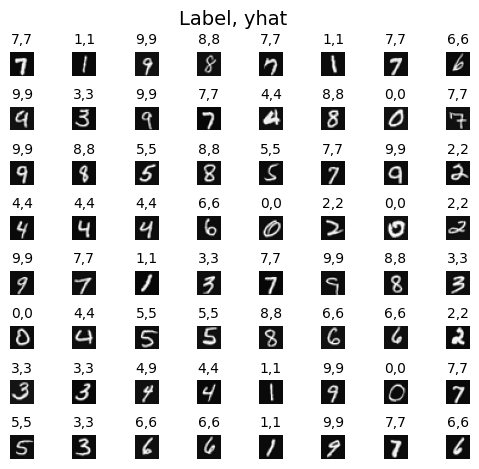

In [35]:
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)

m,n = x.shape
fig,axes = plt.subplots(8,8,figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91])
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    x_random_reshaped = x[random_index].reshape((20,20)).T
    
    ax.imshow(x_random_reshaped,cmap='gray')
    prediction = model.predict(x[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()